In [288]:
import json
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import time
print(os.listdir("."))


['.git', '.gitignore', '.vscode', 'data', 'demo', 'exp', 'images', 'LICENSE.md', 'models', 'NOTICE', 'readme', 'README.md', 'requirements.txt', 'src', 'test.json', 'test_pointorder.ipynb']


In [289]:
data_root="data\\outf_all\\chair_train\\"

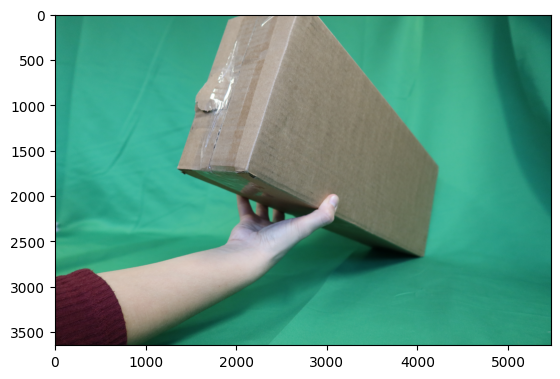

[[3244.2986772112686, 1976.160834463603], [1930.8535715378728, 3625.3640447201265], [2706.9547544151137, 3876.6118376613385], [2106.624832567166, 1856.8132862412078], [1356.000236515448, 1931.9999545839307], [3695.933255185719, 2023.5395096678033], [4235.20382762332, 1999.334736626743], [4046.803691066851, 968.5101611459415], [3496.3255684426695, 1084.80478119114]]


In [290]:
with open(data_root+"mathijs\\Mathijs.json", 'r') as f:
    data=json.load(f)
    

test_dict=data[70]
m_img=plt.imread(data_root+"\\mathijs\\"+test_dict["image_name"])
plt.imshow(m_img)
plt.show()
m_points=test_dict["points"]
print(m_points)


In [291]:
# with open(data_root+"objectron\\00002.json", 'r') as f:
#     data=json.load(f)
# o_points=data["objects"][0]["projected_cuboid"]
# print(o_points)
# o_img=plt.imread(data_root+"objectron\\00002.png")
# plt.imshow(o_img)
# plt.show()

# order points in the json of objectron: 
plan faurthes away from camera: from bottom left - right- up left- up right 
same order for the other plain

In [292]:

# for p in o_points[1:]:
#      plt.imshow(o_img)
#      plt.scatter(p[0], p[1], cmap='r')
#      plt.show()

In [293]:
# idee oppervlak:
front=[1,2,3,4]
back= [5,6,7,8]
left = [1,4,8,5] # eerste en laatste 
right= [2,3, 7, 6] # 2 middelste 
top=[1,2,6,5] # eerste 2 
bottem=[3,4,8,7] # laatste 2 
vlakken=[front, back, left, right, top, bottem]


In [294]:
def PolyArea(x,y):
    return 0.5*np.abs(np.dot(x,np.roll(y,1))-np.dot(y,np.roll(x,1)))
    

In [295]:
def area(vlak):
    x=[]
    y=[]
    for p in vlak:
        # print(p)
        x.append(m_points[p][0])
        y.append(m_points[p][1])
    x=np.array(x)
    y=np.array(y)
    area=PolyArea(x, y)
    return area

In [296]:
# find the biggest
def get_biggest(vlakken):
    big=0
    for i, v in enumerate(vlakken):
        A= area(v)
        if A> big:
            big=A
            index=i

    return index

In [297]:
def chang_front(index, vlakken):
    n_front=vlakken[index]
    if (index % 2) == 0: 
        n_back=vlakken[index+1]
    else:
        n_back=vlakken[index-1]
    
    return n_front, n_back

In [298]:

index=get_biggest(vlakken)
n_front, n_back=chang_front(index,vlakken)

print(n_front)
print(n_back)



[2, 3, 7, 6]
[1, 4, 8, 5]


In [299]:
Real_front=[]
for i in n_front:
    Real_front.append(m_points[i])
Real_back=[]
for i in n_back:
    Real_back.append(m_points[i])

In [300]:
def sort(A):
    return A[np.argsort(A[:, 0])]

In [301]:
Real_front=sort(np.array(Real_front))
Real_back=sort(np.array(Real_back))

print(Real_front)
print()
print(Real_back)

[[2106.62483257 1856.81328624]
 [2706.95475442 3876.61183766]
 [4046.80369107  968.51016115]
 [4235.20382762 1999.33473663]]

[[1356.00023652 1931.99995458]
 [1930.85357154 3625.36404472]
 [3496.32556844 1084.80478119]
 [3695.93325519 2023.53950967]]


In [302]:
def check_smallest_y(points):
        if points[0][1]<points[1][1]:
            return  points[0]
        else :
            return  points[1]
        
def check_biggest_y(points):
        if points[0][1]>points[1][1]:
            return  points[0]
        else :
            return  points[1]

In [303]:
Final_list_order=np.array(m_points)
# onderste links
Final_list_order[1]=check_smallest_y(Real_back[0:2])
Final_list_order[2]=check_smallest_y(Real_front[0:2])

# Boven links
Final_list_order[3]=check_biggest_y(Real_back[0:2])
Final_list_order[4]=check_biggest_y(Real_front[0:2])

# onder rechts
Final_list_order[5]=check_smallest_y(Real_back[2:4])
Final_list_order[6]=check_smallest_y(Real_front[2:4])
# boven rechts
Final_list_order[7]=check_biggest_y(Real_back[2:4])
Final_list_order[8]=check_biggest_y(Real_front[2:4])




Invert y axis in annotation: 

In [304]:
h, w, c=m_img.shape
for i in range(len(Final_list_order)):
    Final_list_order[i][1]=h-Final_list_order[i][1]

In [305]:
# for i, p in enumerate(Final_list_order[1:]):
#      plt.imshow(m_img)
#      plt.scatter(p[0], p[1], cmap='b')
#      plt.title(f"{i+1}")
#      plt.show()
print(Final_list_order)

[[3244.29867721 1671.83916554]
 [1356.00023652 1716.00004542]
 [2106.62483257 1791.18671376]
 [1930.85357154   22.63595528]
 [2706.95475442 -228.61183766]
 [3496.32556844 2563.19521881]
 [4046.80369107 2679.48983885]
 [3695.93325519 1624.46049033]
 [4235.20382762 1648.66526337]]
